In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
# Output is zip object in memory. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | harper
Processing Record 3 of Set 1 | takoradi
Processing Record 4 of Set 1 | lagoa
Processing Record 5 of Set 1 | half moon bay
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | vestmanna
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | gayny
Processing Record 11 of Set 1 | yar-sale
Processing Record 12 of Set 1 | khakhea
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | batouri
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | altamont
Processing Record 18 of Set 1 | itarema
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | puerto ayacucho
Processing Record 21 of Set 1 | praia
Processing Record 22 of Set 1 | ushuaia
Processing Re

Processing Record 38 of Set 4 | barcelos
Processing Record 39 of Set 4 | guerrero negro
Processing Record 40 of Set 4 | urumqi
Processing Record 41 of Set 4 | fukuma
Processing Record 42 of Set 4 | saldanha
Processing Record 43 of Set 4 | khao wong
Processing Record 44 of Set 4 | gwadar
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | mehamn
Processing Record 47 of Set 4 | porto santo
Processing Record 48 of Set 4 | millinocket
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 50 of Set 4 | brownsville
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | dukat
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | jiddah
City not found. Skipping...
Processing Record 5 of Set 5 | batticaloa
Processing Record 6 of Set 5 | svetlogorsk
Processing Record 7 of Set 5 | diffa
Processing Record 8 of Set 5 | moussoro
Processing Record 9 of Set 5 | meulaboh
Processing Record 10 of Set 5 | east london
Processing

Processing Record 30 of Set 8 | marawi
Processing Record 31 of Set 8 | luancheng
Processing Record 32 of Set 8 | kijang
Processing Record 33 of Set 8 | chokwe
Processing Record 34 of Set 8 | pandan
Processing Record 35 of Set 8 | te anau
Processing Record 36 of Set 8 | deputatskiy
Processing Record 37 of Set 8 | san cristobal
Processing Record 38 of Set 8 | qaqortoq
Processing Record 39 of Set 8 | ixtapa
Processing Record 40 of Set 8 | marathopolis
City not found. Skipping...
Processing Record 41 of Set 8 | gravdal
Processing Record 42 of Set 8 | vadlapudi
Processing Record 43 of Set 8 | nganjuk
Processing Record 44 of Set 8 | omis
Processing Record 45 of Set 8 | maceio
Processing Record 46 of Set 8 | puerto escondido
Processing Record 47 of Set 8 | biak
Processing Record 48 of Set 8 | tilichiki
Processing Record 49 of Set 8 | veere
Processing Record 50 of Set 8 | springbok
Processing Record 1 of Set 9 | quakenbruck
Processing Record 2 of Set 9 | sao felix do xingu
Processing Record 3 

Processing Record 21 of Set 12 | asau
Processing Record 22 of Set 12 | barabinsk
Processing Record 23 of Set 12 | albanel
Processing Record 24 of Set 12 | hovd
Processing Record 25 of Set 12 | bubaque
Processing Record 26 of Set 12 | shenzhen
Processing Record 27 of Set 12 | thomaston
Processing Record 28 of Set 12 | paamiut
Processing Record 29 of Set 12 | jaque
Processing Record 30 of Set 12 | yaan
Processing Record 31 of Set 12 | karatuzskoye
Processing Record 32 of Set 12 | dwarka
Processing Record 33 of Set 12 | zabol
Processing Record 34 of Set 12 | scarborough
Processing Record 35 of Set 12 | ituni
City not found. Skipping...
Processing Record 36 of Set 12 | antofagasta
Processing Record 37 of Set 12 | abalak
Processing Record 38 of Set 12 | quesnel
Processing Record 39 of Set 12 | samarai
Processing Record 40 of Set 12 | westport
Processing Record 41 of Set 12 | cradock
Processing Record 42 of Set 12 | bemidji
Processing Record 43 of Set 12 | seoul
Processing Record 44 of Set 1

In [9]:
print(len(city_data))

588


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Harper,4.3750,-7.7169,79.52,86,61,7.16,LR,2022-01-30 22:37:44
1,Takoradi,4.8845,-1.7554,78.69,83,85,4.94,GH,2022-01-30 22:33:18
2,Lagoa,39.0500,-27.9833,58.51,70,58,25.90,PT,2022-01-30 22:35:30
3,Half Moon Bay,37.4636,-122.4286,67.41,72,0,4.00,US,2022-01-30 22:37:45
4,Bengkulu,-3.8004,102.2655,75.49,89,99,4.18,ID,2022-01-30 22:37:45
5,Vestmanna,62.1564,-7.1664,34.72,75,100,32.21,FO,2022-01-30 22:35:39
6,Provideniya,64.3833,-173.3000,10.51,72,0,15.66,RU,2022-01-30 22:37:46
7,Albany,42.6001,-73.9662,18.23,44,15,4.21,US,2022-01-30 22:33:49
8,Gayny,60.3071,54.3241,-4.45,100,91,2.75,RU,2022-01-30 22:33:17
9,Yar-Sale,66.8333,70.8333,-6.30,98,87,7.20,RU,2022-01-30 22:33:13


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Harper,LR,2022-01-30 22:37:44,4.3750,-7.7169,79.52,86,61,7.16
1,Takoradi,GH,2022-01-30 22:33:18,4.8845,-1.7554,78.69,83,85,4.94
2,Lagoa,PT,2022-01-30 22:35:30,39.0500,-27.9833,58.51,70,58,25.90
3,Half Moon Bay,US,2022-01-30 22:37:45,37.4636,-122.4286,67.41,72,0,4.00
4,Bengkulu,ID,2022-01-30 22:37:45,-3.8004,102.2655,75.49,89,99,4.18
5,Vestmanna,FO,2022-01-30 22:35:39,62.1564,-7.1664,34.72,75,100,32.21
6,Provideniya,RU,2022-01-30 22:37:46,64.3833,-173.3000,10.51,72,0,15.66
7,Albany,US,2022-01-30 22:33:49,42.6001,-73.9662,18.23,44,15,4.21
8,Gayny,RU,2022-01-30 22:33:17,60.3071,54.3241,-4.45,100,91,2.75
9,Yar-Sale,RU,2022-01-30 22:33:13,66.8333,70.8333,-6.30,98,87,7.20


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

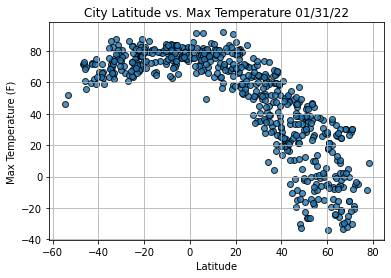

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

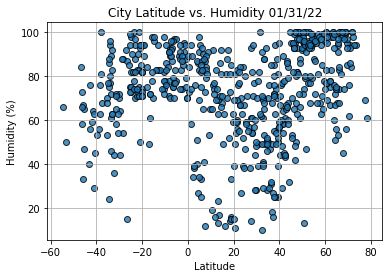

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

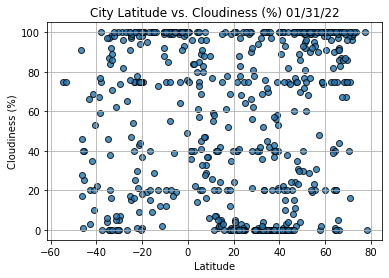

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

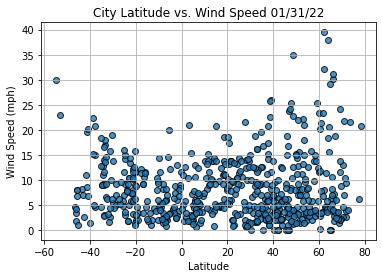

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()